In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import pydotplus
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

### Importing Required Libraries

### Loading Data

In [ ]:
wine = pd.read_csv("/content/winequality-red.csv")
wine.head()

fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.4              0.70         0.00  ...       0.56      9.4        5
1            7.8              0.88         0.00  ...       0.68      9.8        5
2            7.8              0.76         0.04  ...       0.65      9.8        5
3           11.2              0.28         0.56  ...       0.58      9.8        6
4            7.4              0.70         0.00  ...       0.56      9.4        5

[5 rows x 12 columns]

### Data Exploration

In [ ]:
wine.shape

(1599, 12)

In [ ]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
wine.describe()

fixed acidity  volatile acidity  ...      alcohol      quality
count    1599.000000       1599.000000  ...  1599.000000  1599.000000
mean        8.319637          0.527821  ...    10.422983     5.636023
std         1.741096          0.179060  ...     1.065668     0.807569
min         4.600000          0.120000  ...     8.400000     3.000000
25%         7.100000          0.390000  ...     9.500000     5.000000
50%         7.900000          0.520000  ...    10.200000     6.000000
75%         9.200000          0.640000  ...    11.100000     6.000000
max        15.900000          1.580000  ...    14.900000     8.000000

[8 rows x 12 columns]

In [ ]:
wine.isnull().sum() #Checking null values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Data Exploration

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

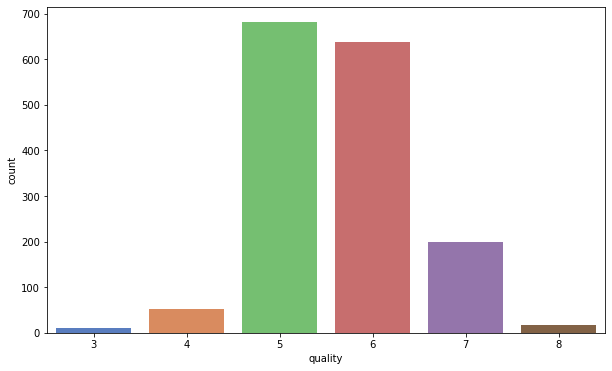

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(wine["quality"], palette="muted")
wine["quality"].value_counts()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


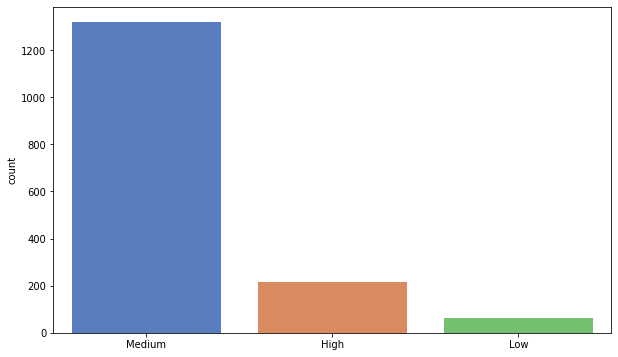

In [ ]:
#As in before cell we have plotted target variable graph and so here we transformed the quality(target variable) into medium,high and low and then plotted the same

quality = wine["quality"].values
category = []
for num in quality:
    if num < 5:
        category.append("Low")
    elif num > 6:
        category.append("High")
    else:
        category.append("Medium")

plt.figure(figsize=(10, 6))
sns.countplot(category, palette="muted")

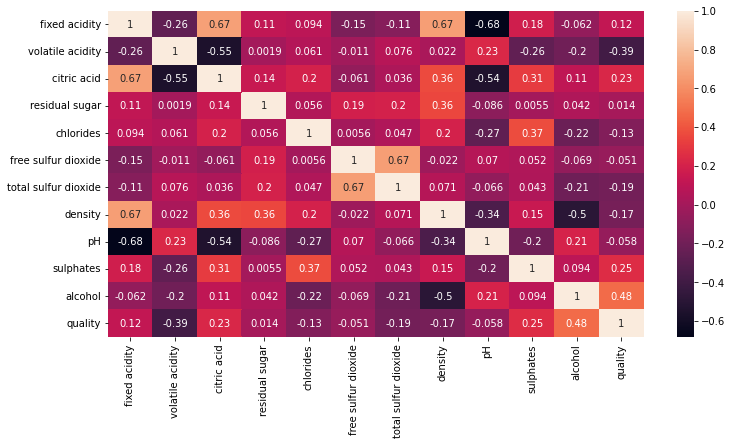

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(wine.corr(), annot=True)

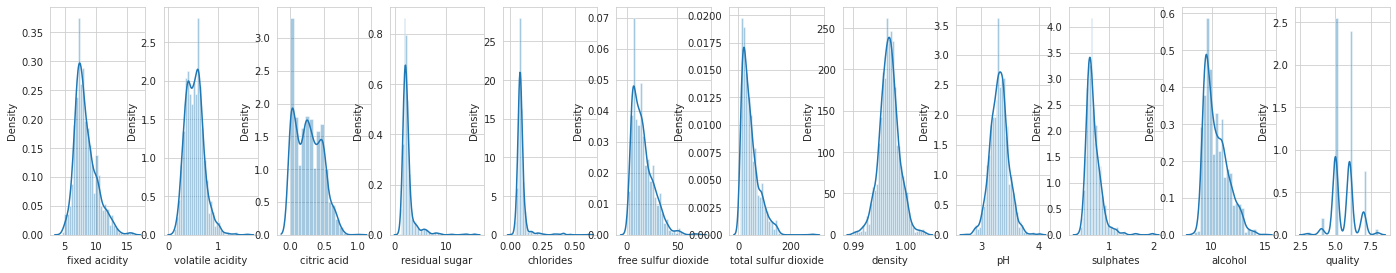

In [ ]:
l = wine.columns.values
number_of_columns=12
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(wine[l[i]],kde=True)

#Observations of the graph
#"pH" column appears to be normally distributed where as remaining all independent variables are right skewed/positively skewed.

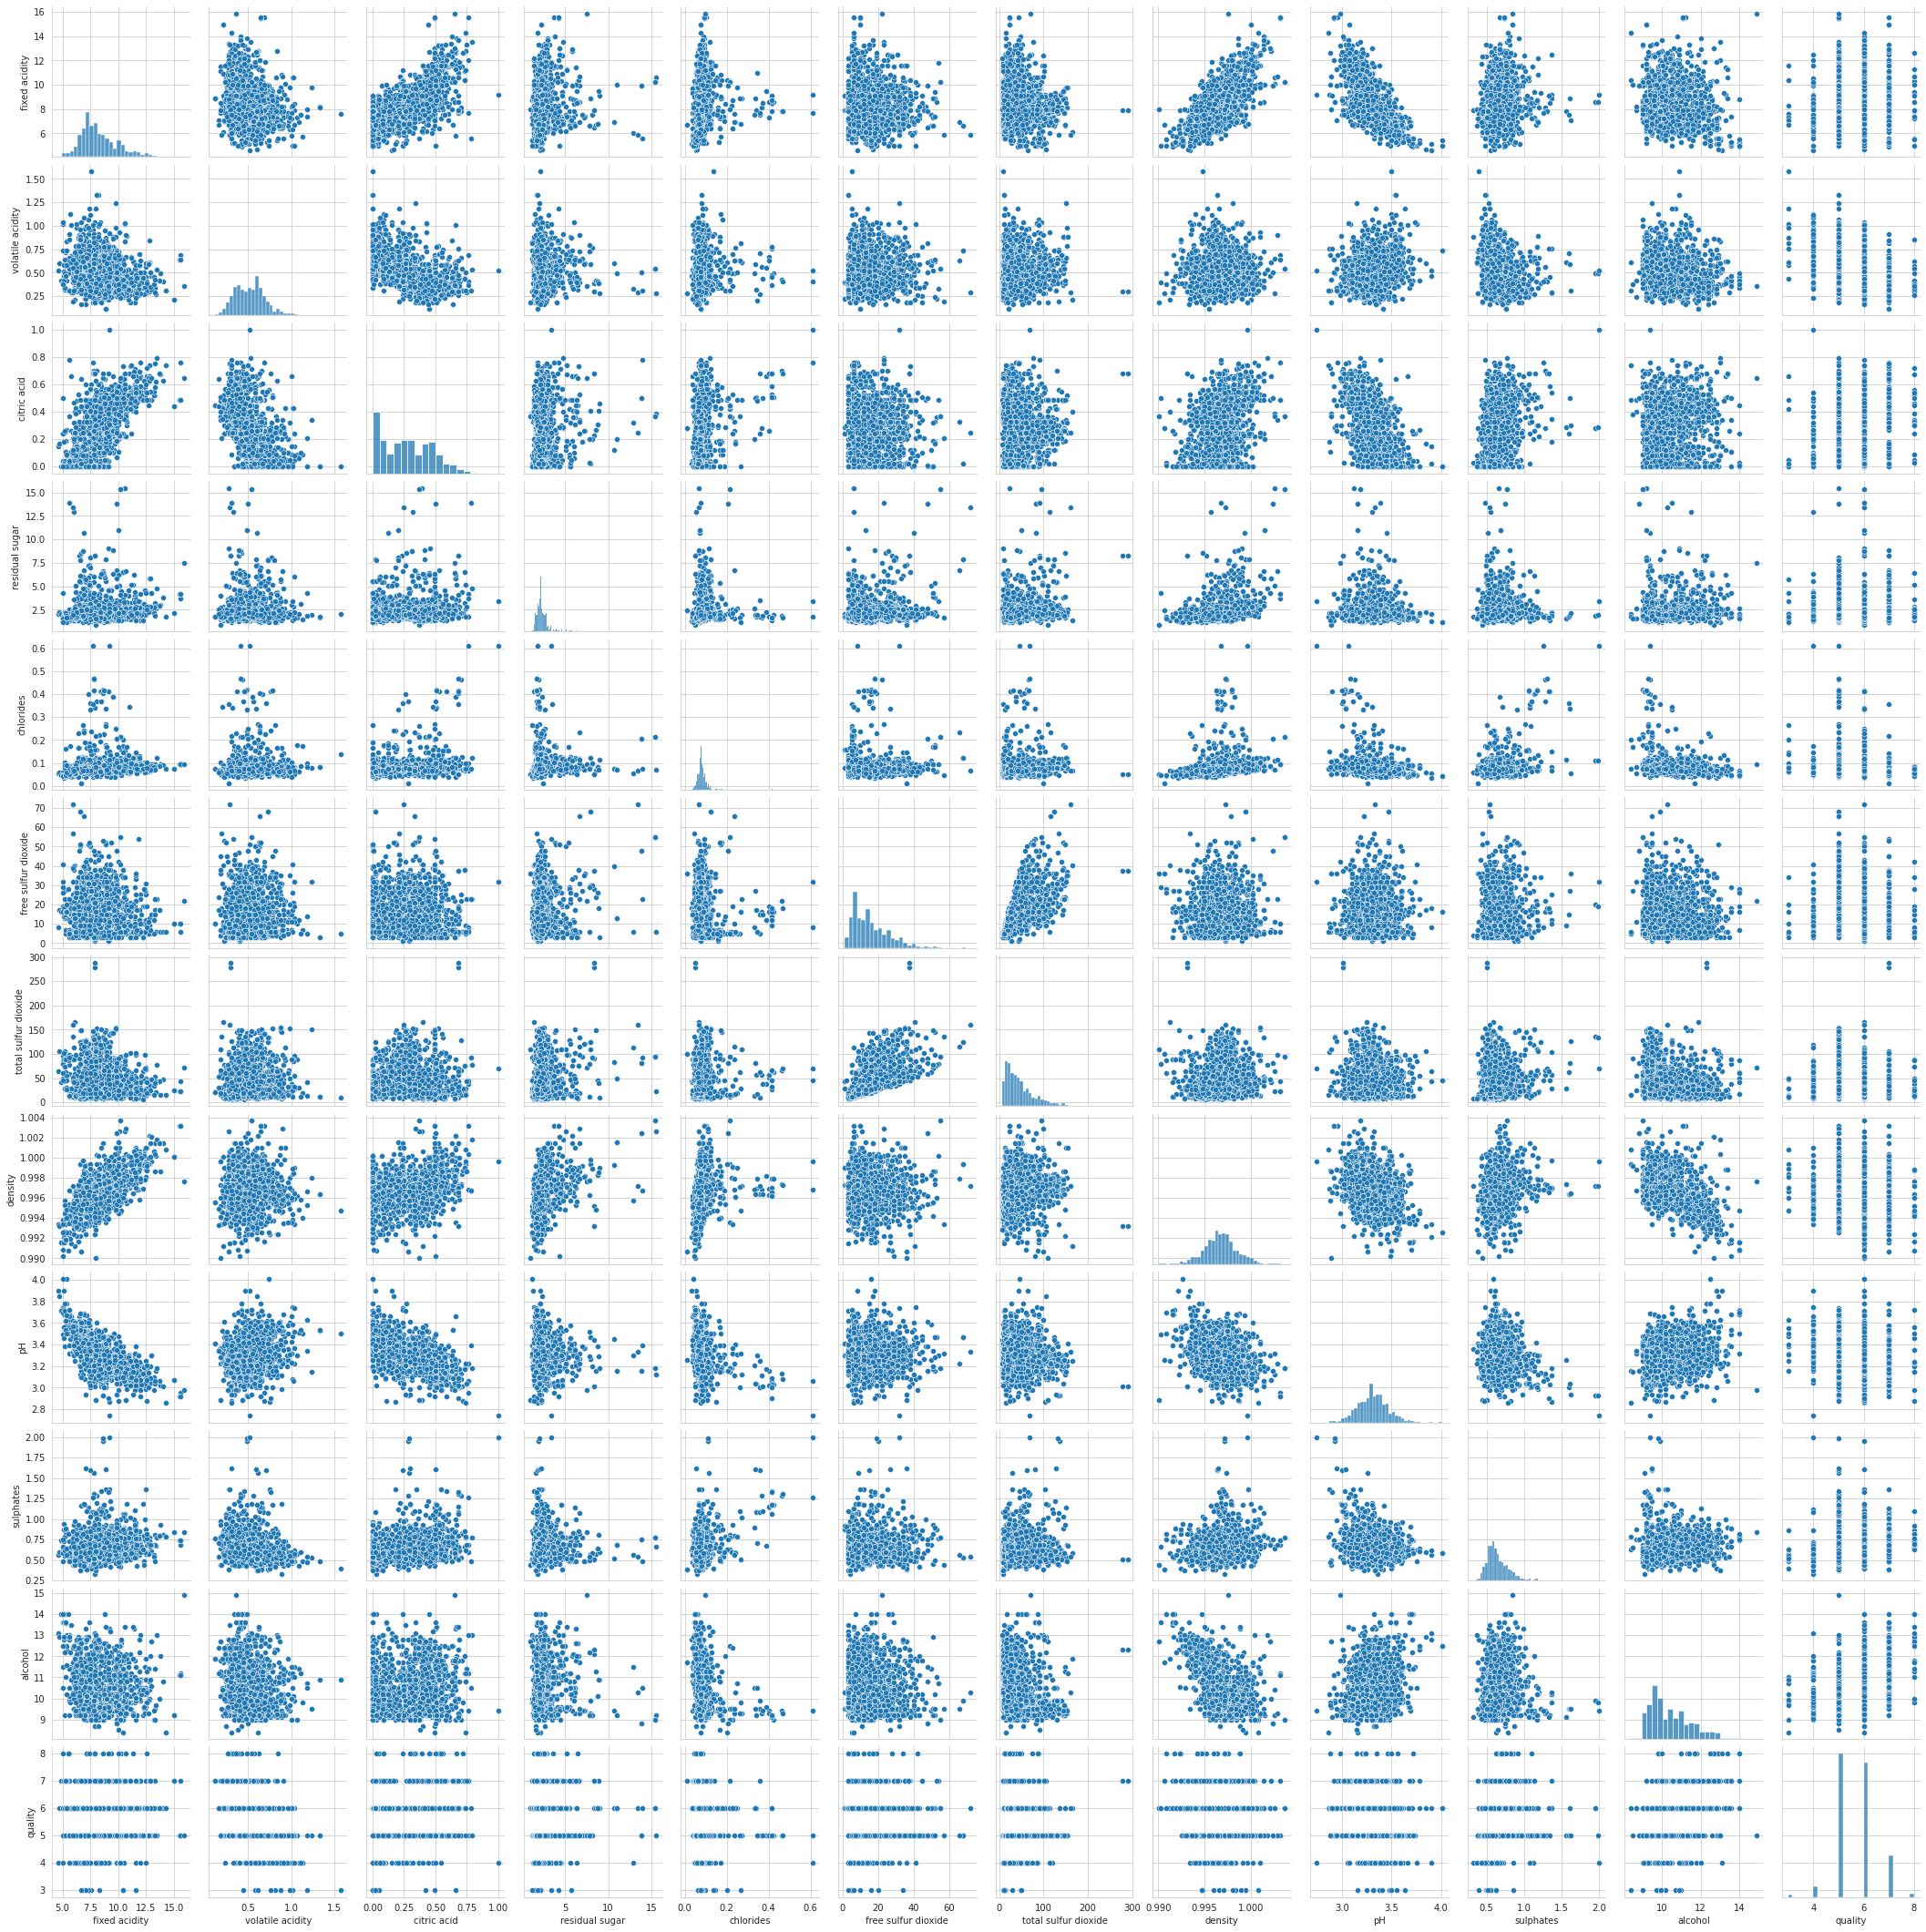

In [ ]:
sns.pairplot(wine)

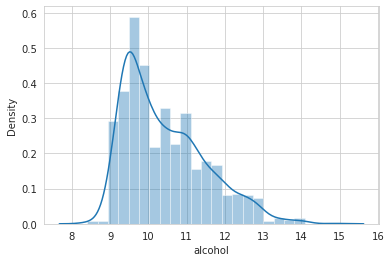

In [ ]:
sns.distplot(wine['alcohol'])

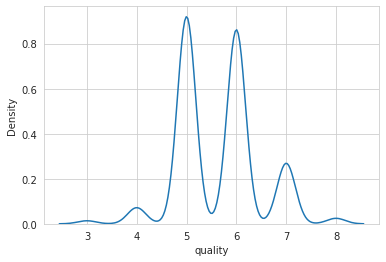

In [ ]:
sns.kdeplot(wine.query('quality > 2').quality)

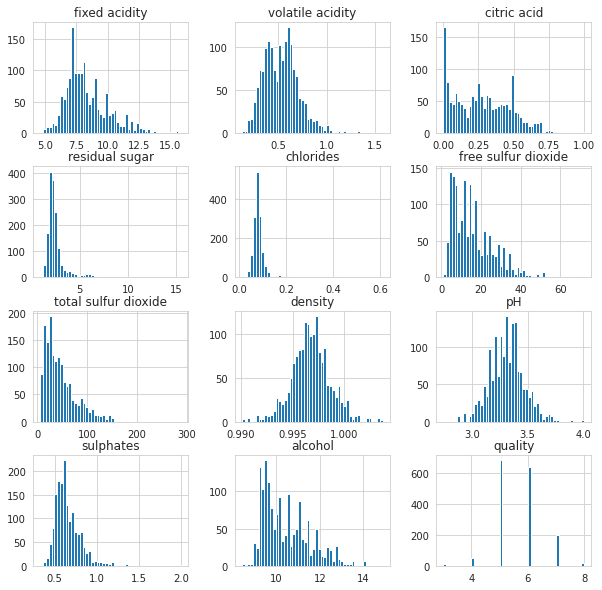

In [ ]:
wine.hist(figsize=(10,10),bins=50)
plt.show()

### Model Evaluation

In [ ]:
# Create Classification version of target variable
wine['goodquality'] = [1 if x >= 7 else 0 for x in wine['quality']]# Separate feature variables and target variable
X = wine.drop(['quality','goodquality'], axis = 1)
y = wine['goodquality']

In [ ]:
# See proportion of good vs bad wines
wine['goodquality'].value_counts()

0    1382
1     217
Name: goodquality, dtype: int64

In [ ]:
X.head()

fixed acidity  volatile acidity  citric acid  ...    pH  sulphates  alcohol
0            7.4              0.70         0.00  ...  3.51       0.56      9.4
1            7.8              0.88         0.00  ...  3.20       0.68      9.8
2            7.8              0.76         0.04  ...  3.26       0.65      9.8
3           11.2              0.28         0.56  ...  3.16       0.58      9.8
4            7.4              0.70         0.00  ...  3.51       0.56      9.4

[5 rows x 11 columns]

In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: goodquality, dtype: int64

### Decision Tree Implementation

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=7)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy',random_state=7)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,y_pred))

Accuracy Score: 0.8645833333333334


In [ ]:
from sklearn.tree import export_text
text_representation = export_text(model)
print(text_representation)

|--- feature_10 <= 10.95
|   |--- feature_9 <= 0.64
|   |   |--- feature_5 <= 15.50
|   |   |   |--- feature_5 <= 8.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_5 >  8.50
|   |   |   |   |--- feature_6 <= 18.50
|   |   |   |   |   |--- feature_6 <= 17.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_6 >  17.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_6 >  18.50
|   |   |   |   |   |--- feature_3 <= 1.25
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_3 >  1.25
|   |   |   |   |   |   |--- feature_9 <= 0.62
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_9 >  0.62
|   |   |   |   |   |   |   |--- feature_4 <= 0.08
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_4 >  0.08
|   |   |   |   |   |   |   |   |--- feature_6 <= 57.00
|   |   |   |   |   |   |   |   |   |--- feature_5 <= 11.00
|   |   |   |   |   |   |   |   |   |   |--- cla

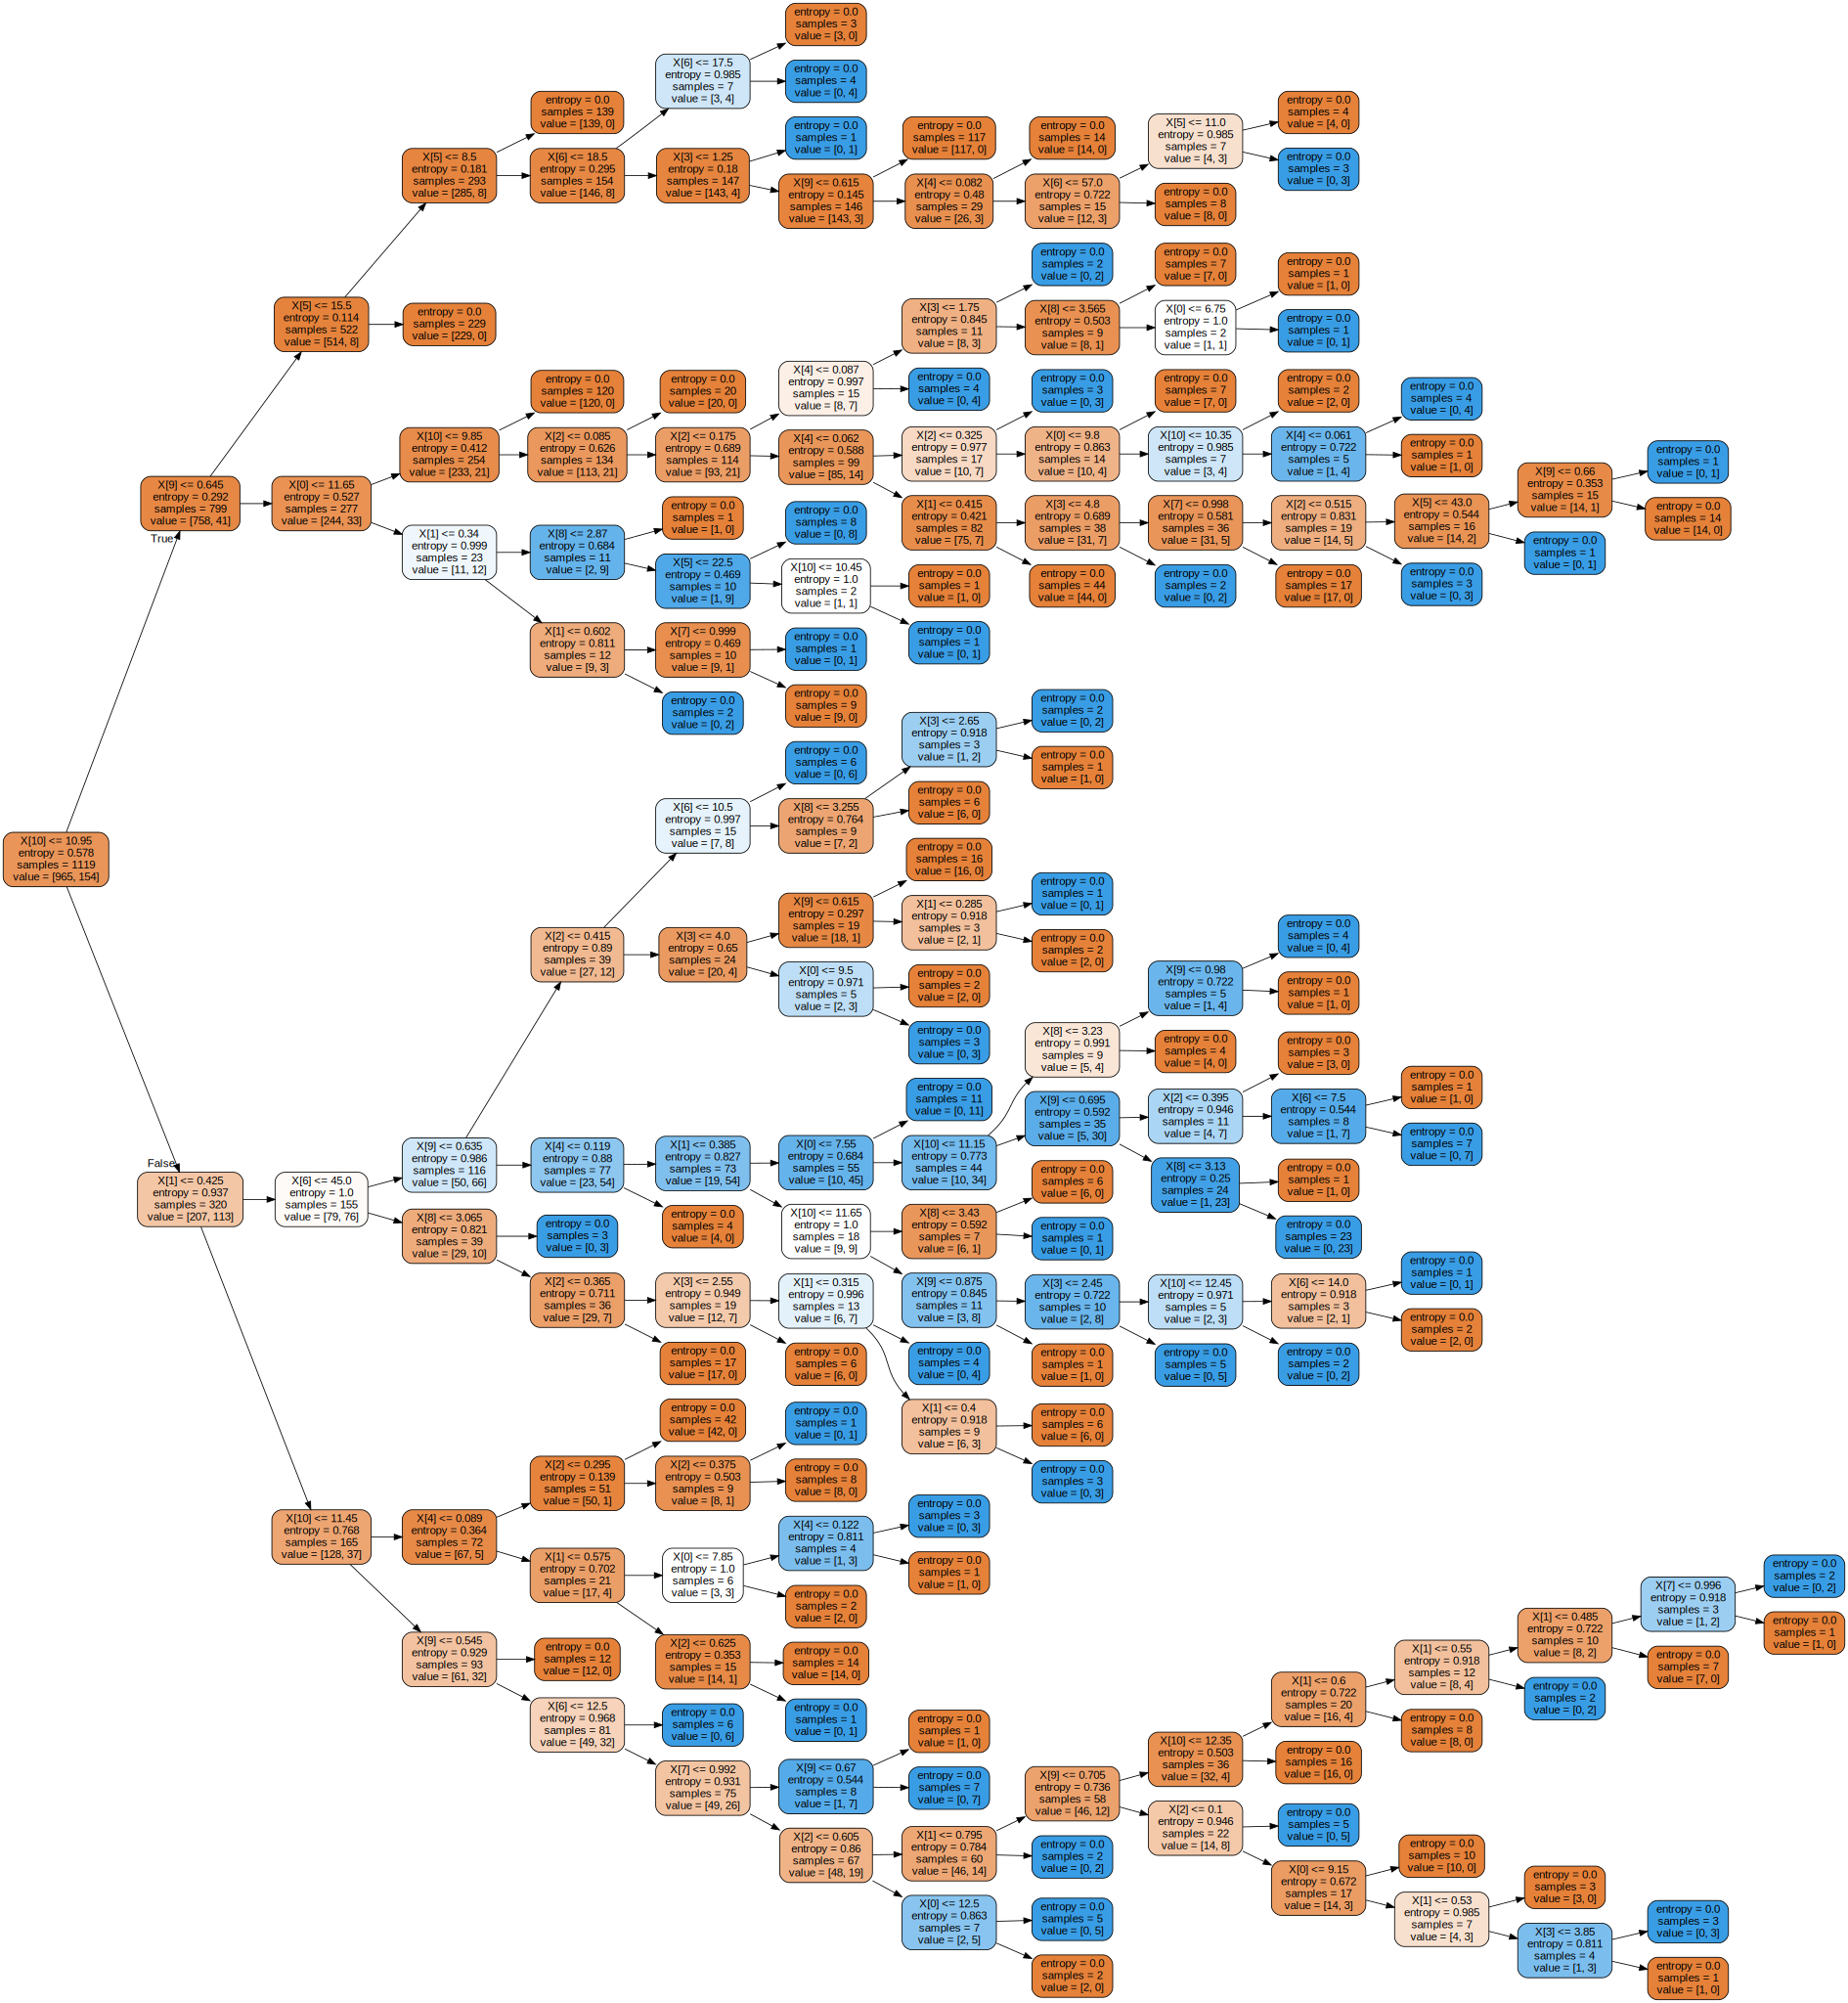

In [ ]:
#Graph Representation of decision tree
import graphviz
from sklearn.tree import export_graphviz
dot_data = export_graphviz(model, out_file=None,filled=True,rotate=True,rounded=True)
graph = graphviz.Source(dot_data,format="png")
graph